# Yinelemeli Sinir Ağlarını Anlamak (RNN-LSTM-GRU)

## RNN

- Şu ana kadar gördüğümüz ağların (CNN-DNN) temel yapısı hafızalarının olmamasıydı
- Karşılarına çıkan her girdiyi birbirinden bağımsız işlerler. Girdiler arasında durum bilgisi tutmazlar.
- Böyle ağlarla dizileri veya zamana bağlı verileriişlemek isterseniz tüm diziyi ağa tek seferde vermelisiniz. (Daha önce yaptığımız IMDB örneği gibi)
- Ancak şu anda okuduğunuz cümleyi aralıklı göz hareketleriyle, öncekileri hafızamızda tutarak, kelime kelime okuyoruz.
- İnsan zekası önceki öğrendiği bilgiyi koruyarak yeni bilgileri geldikçe de güncelleyerek işler
- RNN aynı prensibin daha basit versiyonunu uygular.
- Dizilerin her bir elemanı üzerinde ilerleyerek, o anda öğrendiği bilgiyi durum bilgisi olarak tutarak devam ettirir.
- Tüm veriyi bir hamlede değil,iç döngüde eleman eleman işleyerek devam ettirir.

![](rnn_lstm_gru/1.png)

- RNN, 2B (timesteps,input) tensörleri girdi olarak alır.
- Döngü içerisinde zaman adımı kadar ilerler.
- Mevcut durum t ve input kullanarak çıktı t elde eder.
- Sonraki durum t, bu adımın çıktısı olur.
- İlk adımda önceki durum çıktısı olmadığı için durum bilgisi yoktur. (Tamamı sıfırlardan oluşan Başlangıç durumu)
- Son katmanın çıktısı (timesteps, output) şeklindedir.
- En basit haliyle her döngü adımında önceki değerleri kullanan bir for döngüsüdür.

![](rnn_lstm_gru/2.png)

- SimpleRNN metin gibi çok uzun dizilerle kullanmak için uygun değildir.
- Base model tüm diziyi aldığı için daha çok veriye ulaşıyor.

## LSTM

- SimpleRNN temel bir eksikliği var.
- Teorik olarak t anında önceki tüm adımlardaki girdilerle ilgili bilgiyi tutabilir.
- Ancak uygulamada bu kadar uzun süreli gereksinimlerin öğrenilmesi imkansızdır.
- Gradyanların yok olması problemi, çok derin ileri ağlarda görüldüğü gibi katman ekledikçe ağın eğitilemez olmasıdır.
- Birçok zaman adımının taşınmasını sağlayan bir yol ekler.
- Dizideki bir bilgi, bir sonraki adıma ulaştırılır. Tekrar o bilgiye ihtiyaç duyulduğunda eski yerine geçebilir.
- Böylece bilgiyi sonra kullanmak için saklarken, gradyanların yok olması probleminden etkilenmesini engeller.

![](rnn_lstm_gru/3.png)

![](rnn_lstm_gru/4.png)

**Forget Gate:**
- Hangi bilginin tutulacağı veya unutulacağına karar verir.
- bir sayı 0 ile çarpılırsa ne kadar büyük olursa olsun sonuç 0 olur. 
- Unutmak için girdinin ağırlığına 0 verilir.
- Bir önceki gizli katmandan gelen bilgiler ve güncel bilgiler Sigmoid Fonksiyonundan geçer. 
- 0'a ne kadar yakınsa o kadar unutulacak, 1'e ne kadar yakınsa o kadar tutulacak demektir.

![](rnn_lstm_gru/a.gif)

**Input Gate (Girdi Kapısı):**
- Cell State’i güncellemek için kullanılır. 
- Öncelikle Forget Gate’de (Unutma Kapısı) olduğu gibi Sigmoid fonksiyonu uygulanır, hangi bilginin tutulacağına karar verilir. 
- Daha sonra ağı düzenlemek için Tanh fonksiyonu yardımıyla -1,1 arasına indirgenir ve çıkan iki sonuç çarpılır.

![](rnn_lstm_gru/b.gif)

**Cell State:**
- Cell State’in hücre içerisindeki en önemli görevi bilgiyi taşımaktır. 
- Taşınması gereken verileri alır ve hücre sonuna, oradan da diğer hücrelere taşır. 
- Yani ağ üzerinde veri akışını Cell State yardımıyla sağlarız. 
- İlk olarak Forget Gate’den (Unutma Kapısı) gelen sonuç ile bir önceki katmanın sonucu çarpılır. 
- Daha sonra Input Gate’den (Girdi Kapısı) gelen değer ile toplanır.

![](rnn_lstm_gru/c.gif)

**Output Gate (Çıktı Kapısı):**
- Bir sonraki katmana gönderilecek değere karar verir. 
- Bu değer, tahmin için kullanılır. 
- Öncelikle bir önceki değer ile şu anki girdi Sigmoid fonksiyonundan geçer. 
- Cell State’den gelen değer Tanh fonksiyonundan geçtikten sonra iki değer çarpılır ve bir sonraki katmana “Bir önceki değer” olarak gider. Cell State ilerler.

![](rnn_lstm_gru/d.gif)

## GRU

- GRU, yine LSTM gibi Yinelemeli Sinir Ağlarında ortaya çıkan Kaybolan Gradyan Problemini ele alan bir mimaridir. 
- GRU yine LSTM gibi uzun vadeli bağımlılıkları öğrenme yeteneğine sahiptir. 
- GRU reset-update kapısına sahiptir fakat LSTM ’den farklı olarak bir çıkış kapısına sahip değildir. 
- GRU ‘nun aynı zamanda ayrı bir bellek hücresi yoktur.
- Bundan dolayı daha az parametreye sahiptir.
- Update kapısı; Modele, geçmiş bilgilerin ne kadarının (önceki zaman adımlarından) geleceğe aktarılması gerektiğini belirlemede yardımcı olur
- Reset kapısı; Modele, geçmiş bilgilerin ne kadarının unutacağına karar vermede yardımcı olur

![](rnn_lstm_gru/5.png)

## Metrikler

![](rnn_lstm_gru/6.png)

![](rnn_lstm_gru/7.png)

![](rnn_lstm_gru/8.png)

![](rnn_lstm_gru/9.png)

![](rnn_lstm_gru/10.png)


### Örnek

In [2]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 # Yalnızca en iyi 10 bin kelimeyi göz önünde bulundur
maxlen = 300 # Her film incelemesinin yalnızca ilk 500 kelimesini dikkate al

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words =max_features) # loads the data as list of integers

#Tam sayı listesini 2B tamsayı tensörüne dönüştür (sample, maxlen)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen) 
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen) 

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
c:\users\hppc\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\hppc\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with 

In [3]:
import matplotlib.pyplot as plt

def plot_history(history):    
    plt.plot(history.history['acc'], 'bo', label='Training acc')
    plt.plot(history.history['val_acc'], 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.figure()
    
    plt.plot(history.history['loss'], 'bo', label='Training loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [6]:
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 128)          1280000   
_________________________________________________________________
flatten (Flatten)            (None, 38400)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                1228832   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 2,508,865
Trainable params: 2,508,865
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 44s 53ms/step - loss: 0.5446 - acc: 0.6748 - val_loss: 0.3243 - val_acc: 0.8574
Epoch 2/10
782/782 [==============================] - 40s 51ms/step - loss: 0.1072 - acc: 0.9628 - val_loss: 0.4229 - val_acc: 0.8530
Epoch 3/10
782/782 [==============================] - 40s 51ms/step - loss: 0.0117 - acc: 0.9963 - val_loss: 0.7297 - val_acc: 0.8380
Epoch 4/10
782/782 [==============================] - 40s 52ms/step - loss: 8.1856e-04 - acc: 0.9998 - val_loss: 0.9682 - val_acc: 0.8343
Epoch 5/10
782/782 [==============================] - 41s 52ms/step - loss: 1.0079e-04 - acc: 0.9999 - val_loss: 1.1037 - val_acc: 0.8374
Epoch 6/10
782/782 [==============================] - 41s 52ms/step - loss: 4.6514e-06 - acc: 1.0000 - val_loss: 1.2550 - val_acc: 0.8378
Epoch 7/10
782/782 [==============================] - 41s 53ms/step - loss: 6.0888e-08 - acc: 1.0000 - val_loss: 1.3589 - val_acc: 0.8400
Epoch 8/10
782/782 [==========================

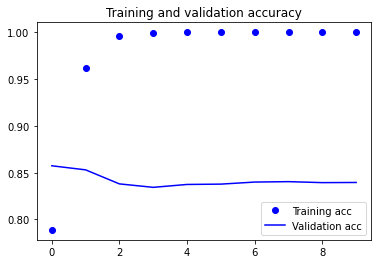

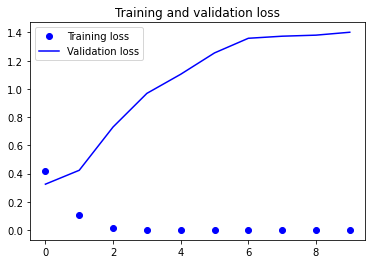

In [12]:
plot_history(history)

In [20]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 5s 6ms/step - loss: 1.4017 - acc: 0.8395


[1.401659369468689, 0.8395199775695801]

In [17]:
from keras.layers import SimpleRNN

simple_rnn = Sequential()
simple_rnn.add(Embedding(max_features, 32, input_length=maxlen))
simple_rnn.add(SimpleRNN(32))
simple_rnn.add(Dense(1, activation='sigmoid'))
simple_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
simple_rnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 32)           320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [18]:
simple_rnn_history = simple_rnn.fit(x_train, y_train,
                                   epochs=10,
                                   batch_size=128,
                                   validation_data=(x_test, y_test))

Epoch 1/10
196/196 [==============================] - 25s 120ms/step - loss: 0.6462 - acc: 0.5978 - val_loss: 0.4347 - val_acc: 0.8106
Epoch 2/10
196/196 [==============================] - 23s 116ms/step - loss: 0.3771 - acc: 0.8430 - val_loss: 0.4214 - val_acc: 0.8254
Epoch 3/10
196/196 [==============================] - 22s 114ms/step - loss: 0.2936 - acc: 0.8821 - val_loss: 0.3713 - val_acc: 0.8379
Epoch 4/10
196/196 [==============================] - 22s 114ms/step - loss: 0.2332 - acc: 0.9119 - val_loss: 0.4211 - val_acc: 0.8059
Epoch 5/10
196/196 [==============================] - 23s 119ms/step - loss: 0.1897 - acc: 0.9275 - val_loss: 0.4105 - val_acc: 0.8242
Epoch 6/10
196/196 [==============================] - 24s 121ms/step - loss: 0.1426 - acc: 0.9479 - val_loss: 0.3944 - val_acc: 0.8523
Epoch 7/10
196/196 [==============================] - 24s 122ms/step - loss: 0.1113 - acc: 0.9600 - val_loss: 0.4723 - val_acc: 0.8432
Epoch 8/10
196/196 [==============================] - 2

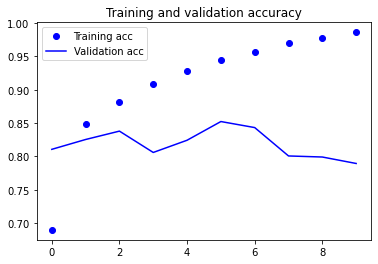

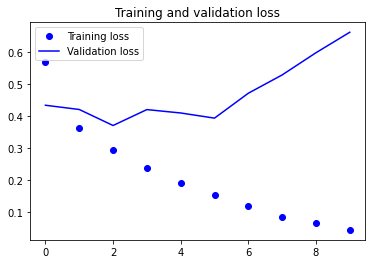

In [19]:
plot_history(simple_rnn_history)

In [21]:
simple_rnn.evaluate(x_test, y_test)

782/782 [==============================] - 11s 14ms/step - loss: 0.6631 - acc: 0.7894


[0.6631066203117371, 0.7893999814987183]

In [23]:
from keras.layers import LSTM

lstm = Sequential()
lstm.add(Embedding(max_features, 32, input_length=maxlen))
lstm.add(LSTM(32))
lstm.add(Dense(1, activation='sigmoid'))
lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
lstm.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 300, 32)           320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [24]:
lstm_history = lstm.fit(x_train, y_train,
                        epochs=10,
                        batch_size=128,
                        validation_data=(x_test, y_test))

Epoch 1/10
196/196 [==============================] - 60s 291ms/step - loss: 0.5661 - acc: 0.6933 - val_loss: 0.3120 - val_acc: 0.8680
Epoch 2/10
196/196 [==============================] - 57s 289ms/step - loss: 0.2811 - acc: 0.8926 - val_loss: 0.3149 - val_acc: 0.8691
Epoch 3/10
196/196 [==============================] - 59s 303ms/step - loss: 0.2175 - acc: 0.9188 - val_loss: 0.2949 - val_acc: 0.8766
Epoch 4/10
196/196 [==============================] - 60s 308ms/step - loss: 0.1999 - acc: 0.9270 - val_loss: 0.3581 - val_acc: 0.8687
Epoch 5/10
196/196 [==============================] - 63s 322ms/step - loss: 0.1658 - acc: 0.9417 - val_loss: 0.3056 - val_acc: 0.8746
Epoch 6/10
196/196 [==============================] - 63s 320ms/step - loss: 0.1466 - acc: 0.9490 - val_loss: 0.5344 - val_acc: 0.8452
Epoch 7/10
196/196 [==============================] - 62s 317ms/step - loss: 0.1423 - acc: 0.9493 - val_loss: 0.4769 - val_acc: 0.8438
Epoch 8/10
196/196 [==============================] - 6

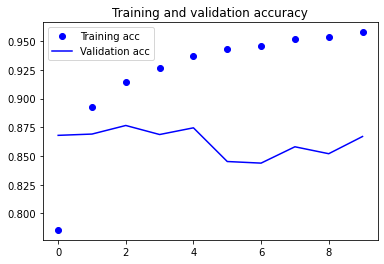

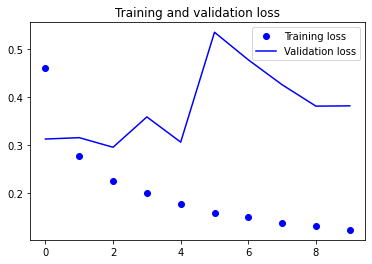

In [25]:
plot_history(lstm_history)

In [27]:
lstm.evaluate(x_test, y_test)

782/782 [==============================] - 26s 33ms/step - loss: 0.3811 - acc: 0.8670


[0.38110512495040894, 0.8669999837875366]

In [5]:
from keras.layers import GRU
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

gru = Sequential()
gru.add(Embedding(max_features, 32, input_length=maxlen))
gru.add(GRU(32))
gru.add(Dense(1, activation='sigmoid'))
gru.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
gru.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 32)           320000    
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________


In [6]:
gru_history = gru.fit(x_train, y_train,
                        epochs=10,
                        batch_size=128,
                        validation_data=(x_test, y_test))

Epoch 1/10
196/196 [==============================] - 67s 315ms/step - loss: 0.6083 - acc: 0.6417 - val_loss: 0.3361 - val_acc: 0.8580
Epoch 2/10
196/196 [==============================] - 56s 287ms/step - loss: 0.2977 - acc: 0.8780 - val_loss: 0.3315 - val_acc: 0.8610
Epoch 3/10
196/196 [==============================] - 59s 303ms/step - loss: 0.2428 - acc: 0.9033 - val_loss: 0.3054 - val_acc: 0.8720
Epoch 4/10
196/196 [==============================] - 59s 300ms/step - loss: 0.1988 - acc: 0.9235 - val_loss: 0.3465 - val_acc: 0.8655
Epoch 5/10
196/196 [==============================] - 61s 310ms/step - loss: 0.1792 - acc: 0.9321 - val_loss: 0.3941 - val_acc: 0.8624
Epoch 6/10
196/196 [==============================] - 60s 305ms/step - loss: 0.1640 - acc: 0.9404 - val_loss: 0.3633 - val_acc: 0.8446
Epoch 7/10
196/196 [==============================] - 59s 302ms/step - loss: 0.1463 - acc: 0.9481 - val_loss: 0.3334 - val_acc: 0.8706
Epoch 8/10
196/196 [==============================] - 6

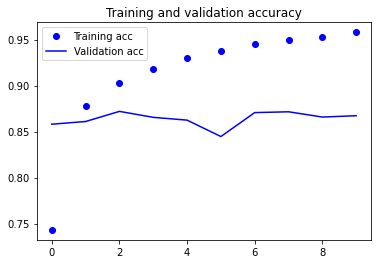

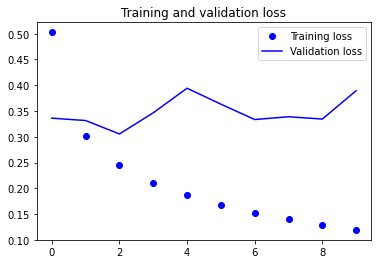

In [7]:
plot_history(gru_history)

In [8]:
gru.evaluate(x_test, y_test)

782/782 [==============================] - ETA: 0s - loss: 0.3894 - acc: 0.8672- ET - ETA: 1s - los - 24s 31ms/step - loss: 0.3894 - acc: 0.8672


[0.3894098699092865, 0.8672400116920471]

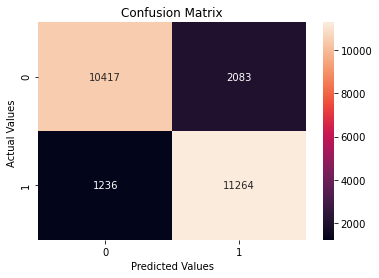

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred=(gru.predict(x_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

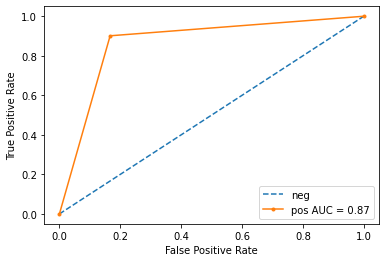

In [10]:
from sklearn.metrics import roc_curve,auc

plt.plot([0, 1], [0, 1], linestyle='--', label='neg')
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, marker='.', label = 'pos AUC = %0.2f' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score

print('Accuracy: %.2f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1-measure: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Accuracy: 0.87
Precision: 0.844
Recall: 0.901
F1-measure: 0.872


## Parametre Optimizasyonu (Keras Tuner)

In [ ]:
!pip install keras-tuner

from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def build_model_function(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=32,
                           max_value=512, step=32), activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=keras.optimizers.Adam(
        hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model
    
tuner = RandomSearch(
    build_model_function,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir')
tuner.search_space_summary()
tuner.search(x, y, epochs=5, validation_data=(val_x, val_y))
models = tuner.get_best_models(num_models=2)
tuner.results_summary()